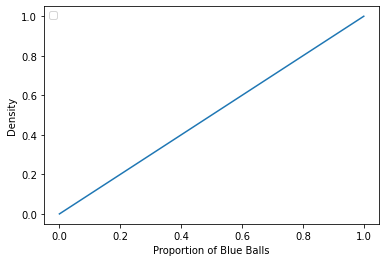

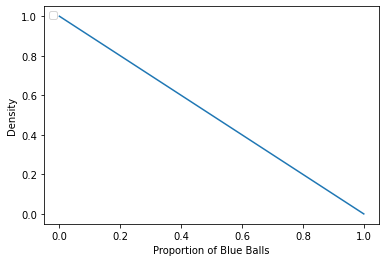

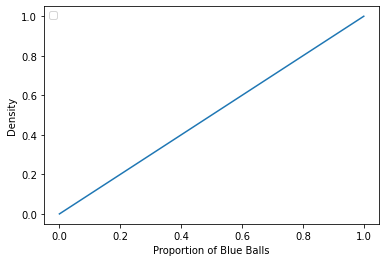

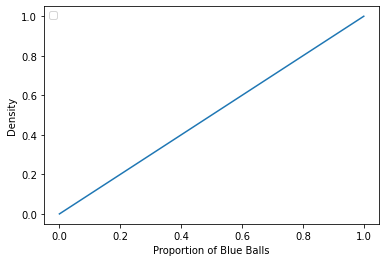

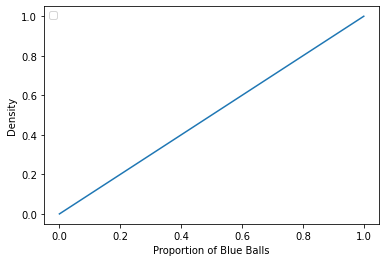

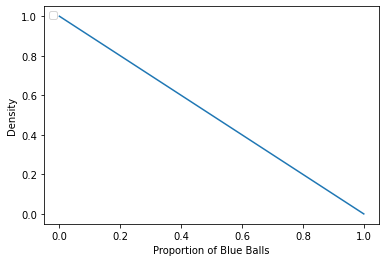

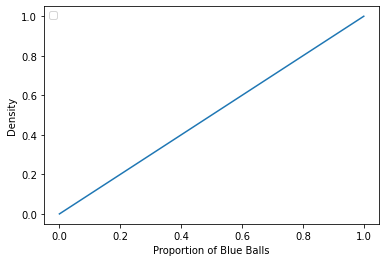

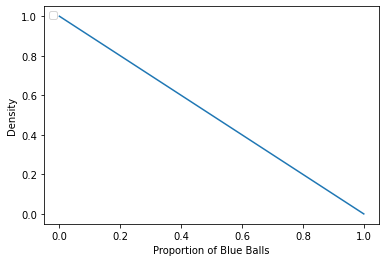

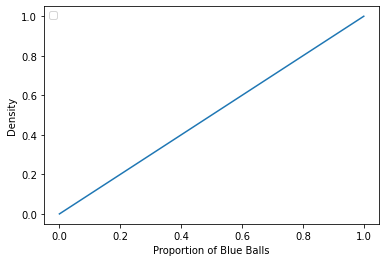

In [88]:
import pymc3 as pm
import numpy as np
import statistics
import matplotlib.pyplot as plt

p=np.array([0,0.25,0.5,0.75,1])
prior=np.array([1,1,1,1,1])/5

samples=np.array([1,0,1,1,1,0,1,0,1])
n=0
mean_p=samples.mean()
std_p=statistics.stdev(samples, mean_p)


for n in range(9):
    with pm.Model() as m4_1:
        prob_data = samples[n]*p+(1-samples[n])*(1-p) #likelyhood
        mu = pm.Normal("mu", mu=mean_p, sd=std_p)
        sigma = pm.Uniform("Sigma", lower=0, upper=1)
        posterior = pm.Normal("Posterior", mu=mu, sd=sigma, observed=prob_data)
        
        plt.legend(["blue", "yellow"], loc="upper left")
        plt.xlabel('Proportion of Blue Balls')
        plt.ylabel('Density')
        plt.plot(prob_data, posterior)
        plt.show()
        